In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [3]:
df = pd.read_csv('cleaneddata.csv')

In [4]:
data = pd.read_csv('cleaneddata.csv')

In [5]:
# Convert 'year' and 'month' columns to datetime format
data['date'] = pd.to_datetime(data['year'].astype(str) + '-' + data['month'].astype(str))

# Set the 'date' column as the index
data.set_index('date', inplace=True)

# Resample the data to monthly frequency
data = data.resample('M').sum()

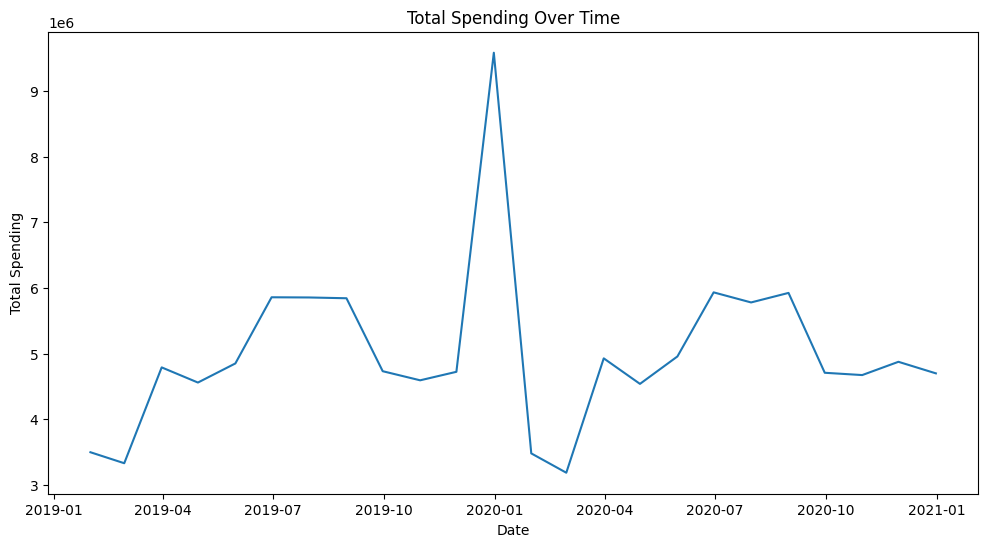

In [6]:
# Plot the total spending over time
plt.figure(figsize=(12, 6))
plt.plot(data['Total_Spending'])
plt.xlabel('Date')
plt.ylabel('Total Spending')
plt.title('Total Spending Over Time')
plt.show()


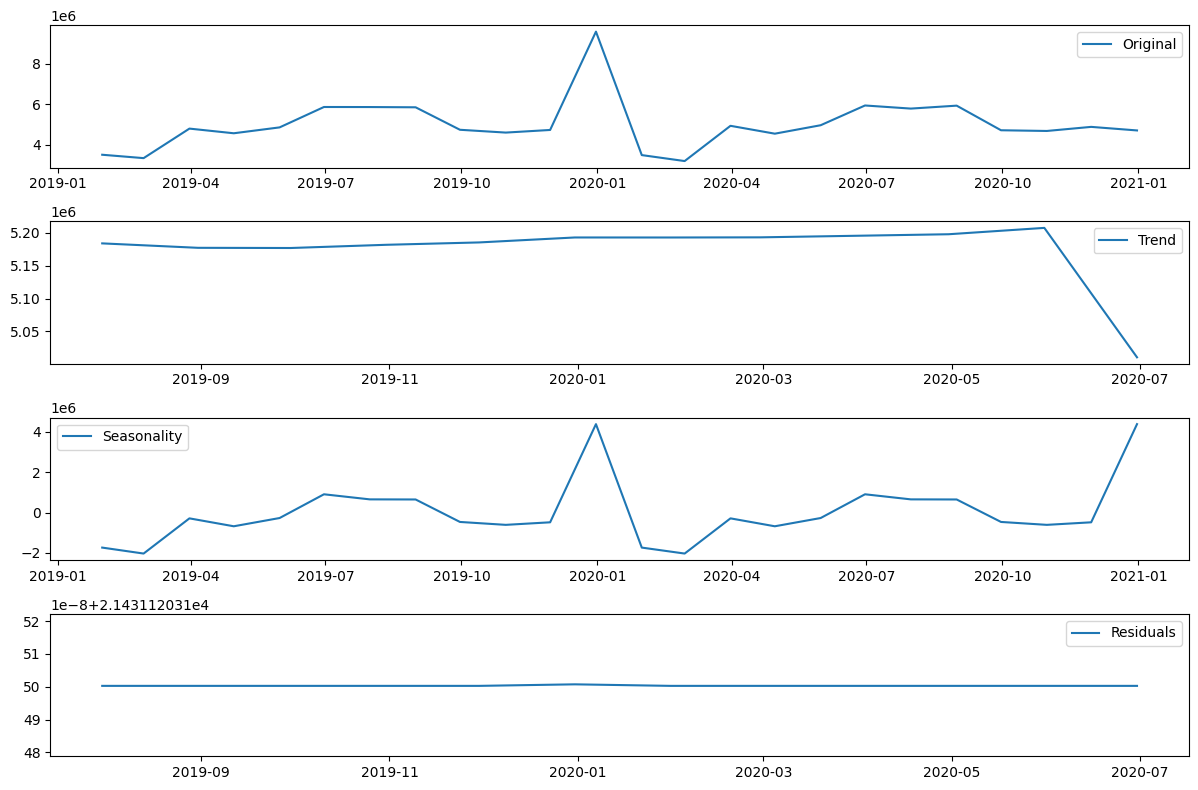

In [7]:
# Decompose the time series
decomposition = seasonal_decompose(data['Total_Spending'], model='additive')

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['Total_Spending'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [8]:
from statsmodels.tsa.stattools import adfuller

# Perform augmented Dickey-Fuller test
result = adfuller(data['Total_Spending'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))


ADF Statistic: -4.684365673361444
p-value: 9.003163971877661e-05
Critical Values:
	1%: -3.7529275211638033
	5%: -2.998499866852963
	10%: -2.6389669754253307


In [9]:
num_data_points = len(data['Total_Spending'])
print("Number of data points:", num_data_points)


Number of data points: 24


<Figure size 1200x600 with 0 Axes>

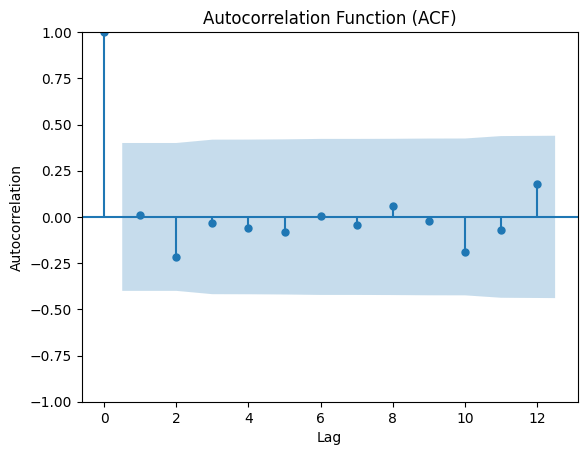

<Figure size 1200x600 with 0 Axes>

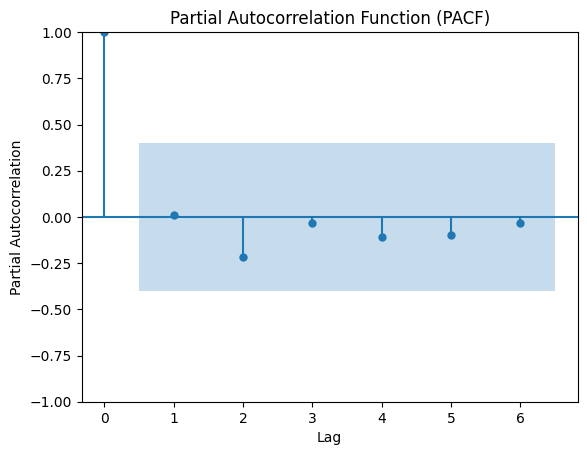

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(data['Total_Spending'], lags=12, alpha=0.05)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(data['Total_Spending'], lags=6, alpha=0.05)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


In [14]:
# Define the SARIMAX model parameters
order = (1, 1, 1)  # Defin4 the order of autoregressive (p), differencing (d), and moving average (q) terms
seasonal_order = (1, 1, 1, 6)  # Define the seasonal order of autoregressive (P), differencing (D), moving average (Q) terms, and the period (s)

# Create and fit the SARIMAX model
model = SARIMAX(data['Total_Spending'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Optionally, print the model summary for details
print(model_fit.summary())


                                     SARIMAX Results                                     
Dep. Variable:                    Total_Spending   No. Observations:                   24
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 6)   Log Likelihood                -271.035
Date:                           Tue, 23 May 2023   AIC                            552.069
Time:                                   02:36:57   BIC                            556.235
Sample:                               01-31-2019   HQIC                           552.483
                                    - 12-31-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0022      0.594     -0.004      0.997      -1.166       1.161
ma.L1         -0.5235      0.718     -0.729

c:\Users\LUKE MARK LEONA\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\LUKE MARK LEONA\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


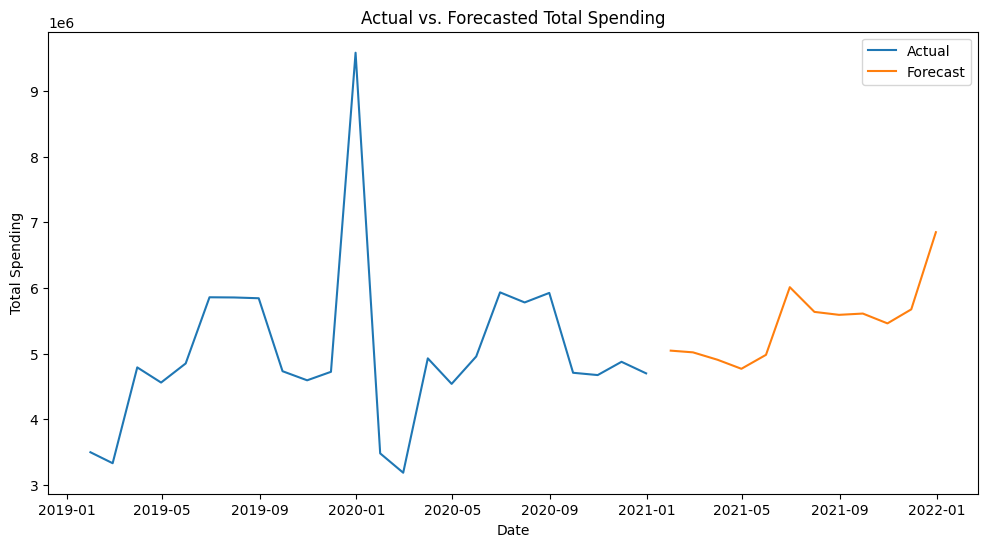

2021-01-31    5.045436e+06
2021-02-28    5.019373e+06
2021-03-31    4.906421e+06
2021-04-30    4.769057e+06
2021-05-31    4.981531e+06
2021-06-30    6.011914e+06
2021-07-31    5.635606e+06
2021-08-31    5.590718e+06
2021-09-30    5.610165e+06
2021-10-31    5.460508e+06
2021-11-30    5.674236e+06
2021-12-31    6.849375e+06
Freq: M, Name: predicted_mean, dtype: float64


In [15]:
# Forecast future spending trends
forecast_periods = 12  # Number of periods to forecast
forecast = model_fit.get_forecast(steps=forecast_periods)

# Extract the forecasted values
forecasted_values = forecast.predicted_mean

# Visualize the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(data['Total_Spending'], label='Actual')
plt.plot(forecasted_values, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Total Spending')
plt.title('Actual vs. Forecasted Total Spending')
plt.legend(loc='best')
plt.show()

# Print the forecasted values
print(forecasted_values)


In [16]:
# Check the dimensions of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (42676, 31)


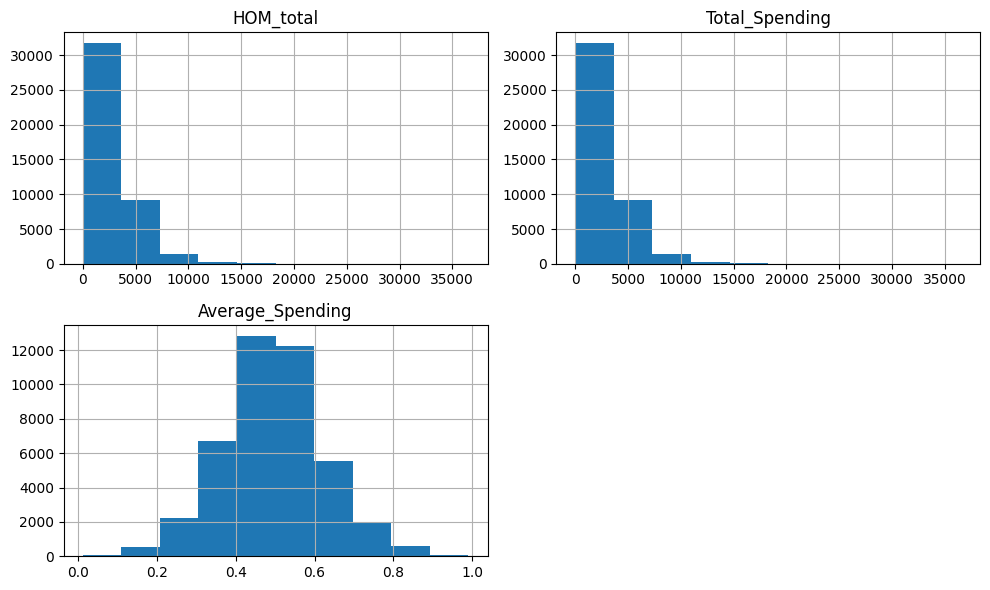

In [17]:
# Plot histograms for numeric variables
numeric_cols = ['HOM_total', 'Total_Spending', 'Average_Spending']
df[numeric_cols].hist(bins=10, figsize=(10, 6))
plt.tight_layout()
plt.show()

In [6]:
# Count the number of unique values in each categorical column
categorical_cols = ['gender', 'job', 'Most_Frequent_Category']
for col in categorical_cols:
    print(df[col].value_counts())




gender
F    21620
M    21056
Name: count, dtype: int64
job
Naval architect                    282
Materials engineer                 282
Quantity surveyor                  235
Scientist, audiological            235
Film/video editor                  235
                                  ... 
Telecommunications researcher       47
Animator                            47
Oceanographer                       47
Engineer, agricultural              47
Producer, television/film/video     47
Name: count, Length: 475, dtype: int64
Most_Frequent_Category
Grocery          13149
Shopping          9528
Travel            7254
Miscellaneous     5076
KidsPets          2087
Home              1939
Entertainment     1213
Food              1031
HealthFitness      720
PersonalCare       679
Name: count, dtype: int64


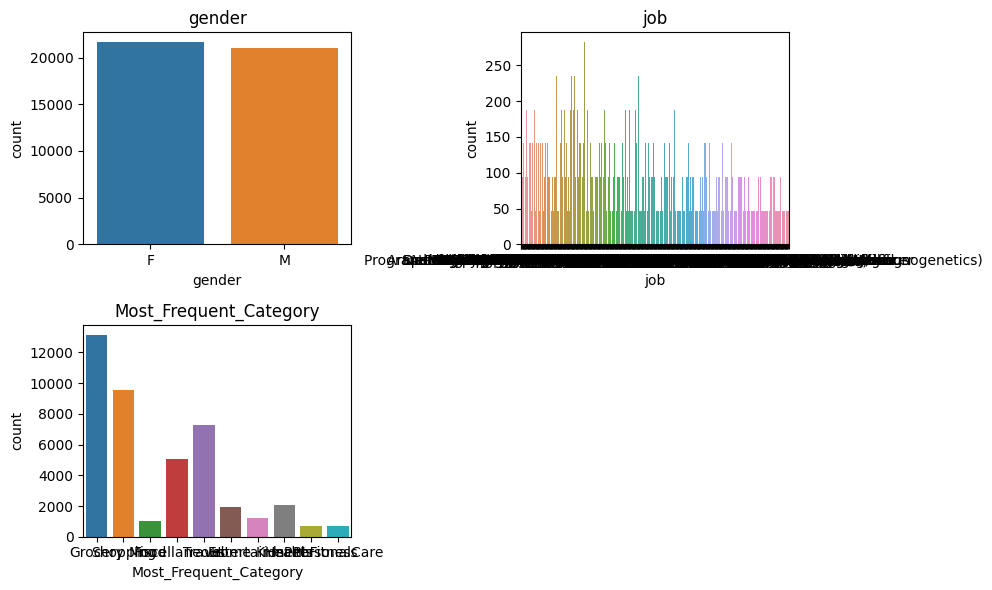

In [7]:
# Plot bar plots for categorical variables
plt.figure(figsize=(10, 6))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i+1)
    sns.countplot(data=df, x=col)
    plt.title(col)
plt.tight_layout()
plt.show()

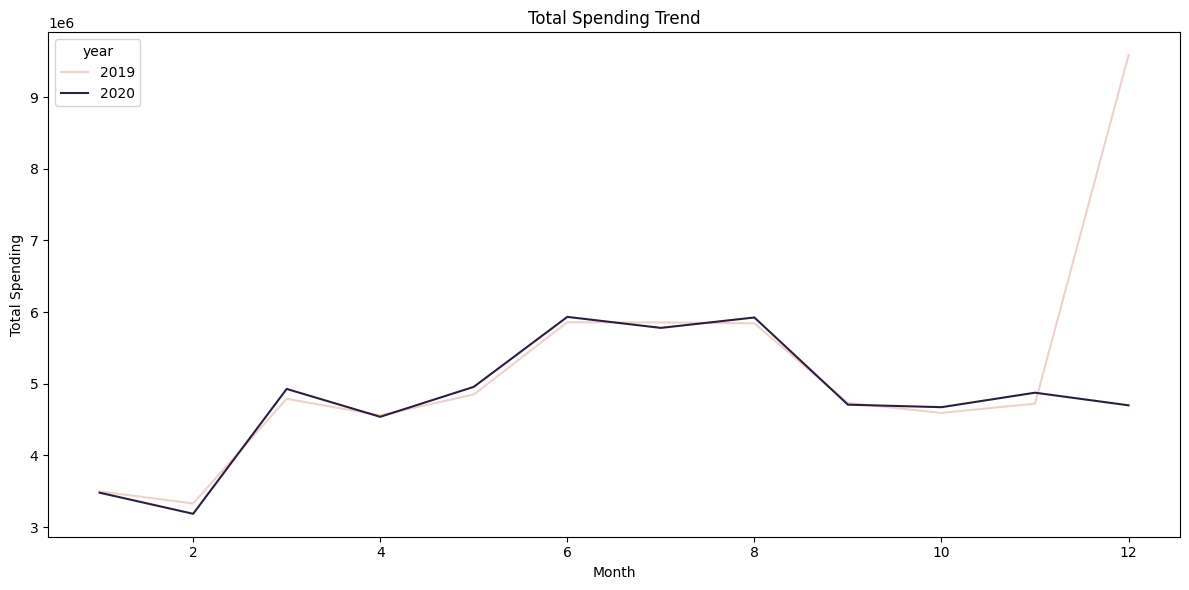

In [8]:
# Group data by year and month, and calculate the total spending per month
monthly_spending = df.groupby(['year', 'month'])['Total_Spending'].sum().reset_index()

# Plot the trend of total spending over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_spending, x='month', y='Total_Spending', hue='year')
plt.title('Total Spending Trend')
plt.xlabel('Month')
plt.ylabel('Total Spending')
plt.tight_layout()
plt.show()


In [9]:
from sklearn.model_selection import train_test_split


In [10]:
# Assuming 'Total_Spending' is the target variable
X = df.drop('Total_Spending', axis=1)
y = df['Total_Spending']


In [11]:
# Split the data into 80% training set and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is called 'df' and the gender column is named 'gender'
le = LabelEncoder()
df['gender_encoded'] = le.fit_transform(df['gender'])


In [27]:
import pandas as pd

# Assuming your DataFrame is called 'df' and the gender column is named 'gender'
df_encoded = pd.get_dummies(df, columns=['gender'], prefix=['gender'])

# 'df_encoded' will contain the one-hot encoded columns for 'gender'


In [30]:
# Assuming your DataFrame is called 'df' and the gender column is named 'gender'
gender_mapping = {'F': 0, 'M': 1}
df['gender_encoded'] = df['gender'].map(gender_mapping)


**MODEL SELECTION**

In [21]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [23]:
# Assuming 'Total_Spending' is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ValueError: could not convert string to float: 'F'

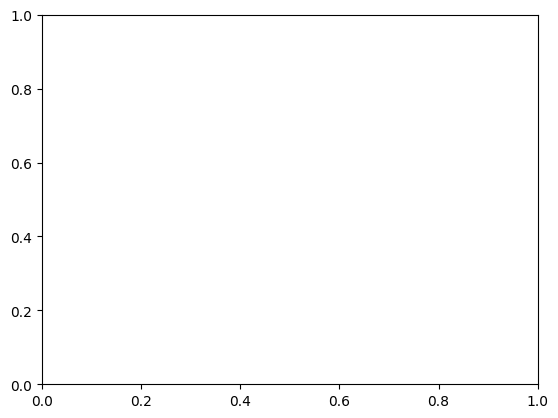

In [33]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Assuming your DataFrame is called 'df' and the gender column is named 'gender'
gender_mapping = {'F': 0, 'M': 1}
df['gender_encoded'] = df['gender'].map(gender_mapping)


# 'df_encoded' will contain the one-hot encoded columns for 'gender'
# Assuming your time series data is in a variable called 'data'
# Plot ACF and PACF
plot_acf(df)
plot_pacf(df)


In [26]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(df)
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ValueError: could not convert string to float: 'F'

In [17]:
# Train the ARIMA model
arima_model = ARIMA(y_train, order=(p, d, q))  # Replace p, d, q with the appropriate values
arima_model_fit = arima_model.fit()

# Make predictions on the testing set
arima_predictions = arima_model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)

# Evaluate the ARIMA model
arima_rmse = mean_squared_error(y_test, arima_predictions, squared=False)


NameError: name 'p' is not defined

In [15]:
# Assuming 'Total_Spending' is the target variable
y_train = df_train['Total_Spending']
y_test = df_test['Total_Spending']


NameError: name 'df_train' is not defined